In [21]:
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import os
import netCDF4 as nc
import cartopy.crs as ccrs
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
# from universal import *
from matplotlib.colors import LinearSegmentedColormap


In [22]:
# Load shapefile using Geopandas
shapefile_path = 'gis/borda_guaiba_2.shp'                                                                                                         
shape_data = gpd.read_file(shapefile_path)

# Define plot extent
lon_min, lon_max = -54.7, -49.7
lat_min, lat_max = -31, -28

# color_ = 'winter_r'

# Colorbar limits
bar_lim_inf = 0
bar_lim_sup = 100000

min_width = 0.1  # Minimum linewidth
max_width = 10.0  # Maximum linewidth

start_color = (0, 0, 1)  # Blue
end_color = (0, 0, 0)    # Black
n = 256
colors = [start_color, end_color]
cmap_name = 'blue_black'
color_ = LinearSegmentedColormap.from_list(cmap_name, colors, N=n)


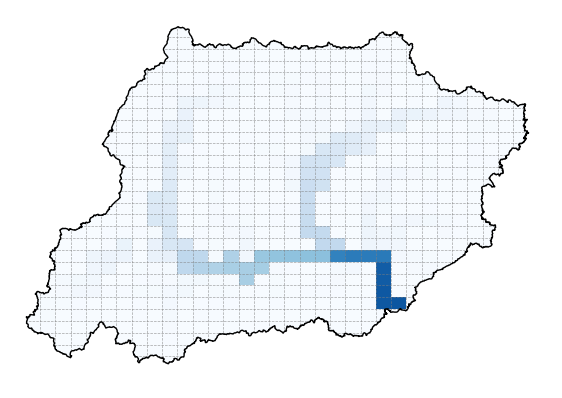

In [23]:
# NASA

filename = '04_NASA/lis_input.global.noahmp401.nc'
file_path = os.path.join(filename)

# Open the NetCDF file
nc_data = nc.Dataset(filename, 'r')

# Calculate longitude and latitude arrays
# Entered manually based on the def print_netcdf_summary output
sw_corner_lon = -179.9296875  # South-West corner longitude
sw_corner_lat = -89.953125    # South-West corner latitude
dx = 0.140625  # Longitude increment
dy = 0.09375   # Latitude increment

longitudes = sw_corner_lon + np.arange(nc_data.dimensions['east_west'].size) * dx
latitudes = sw_corner_lat + np.arange(nc_data.dimensions['north_south'].size) * dy

# Define the latitude and longitude slices for Rio Grande do Sul
lat_bounds = [-32, -26]
lon_bounds = [-57, -49]

# Find the indices for slicing
lat_indices = np.where((latitudes >= lat_bounds[0]) & (latitudes <= lat_bounds[1]))[0]
lon_indices = np.where((longitudes >= lon_bounds[0]) & (longitudes <= lon_bounds[1]))[0]

# Read the streamflow data and slice it
dain_area = nc_data.variables['HYMAP_drain_area'][lat_indices, lon_indices]

# Create a plot
fig, ax = plt.subplots(figsize=(7, 6), subplot_kw={'projection': ccrs.PlateCarree()})

ax.set_extent([lon_bounds[0], lon_bounds[1], lat_bounds[0], lat_bounds[1]], crs=ccrs.PlateCarree())

# Plot the NetCDF data
cf = ax.pcolormesh(longitudes[lon_indices], latitudes[lat_indices], dain_area, shading='auto', cmap='Blues',
                   vmin=bar_lim_inf*1000000, vmax=bar_lim_sup*1000000,transform=ccrs.PlateCarree(), zorder = 2)

# Add the shapefile
shape_data.plot(ax=ax, facecolor='white', edgecolor='black', linewidth=1, marker = 'o', transform=ccrs.PlateCarree(), zorder = 3)


# Add gridlines matching the pixel resolution
gridlines = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.7, linestyle='--')
gridlines.xlocator = plt.MultipleLocator(dx)  # Longitude grid spacing
gridlines.ylocator = plt.MultipleLocator(dy)  # Latitude grid spacing
gridlines.top_labels = False
gridlines.right_labels = False
gridlines.bottom_labels = False
gridlines.left_labels = False

# plt.colorbar(cf, ax=ax, label='Drainage area (m2)', orientation = 'horizontal', shrink = 0.4)

# Customize plot
# ax.set_title(r'GHI - $0.09^\circ$lat, $0.14^\circ$lon')
# ax.set_xticks([])
# ax.set_yticks([])
ax.set_xlim(lon_min, lon_max)
ax.set_ylim(lat_min, lat_max)

# Hide the axes
ax.set_axis_off()

plt.show()

# Close the NetCDF file
nc_data.close()

0.4
2594298.3


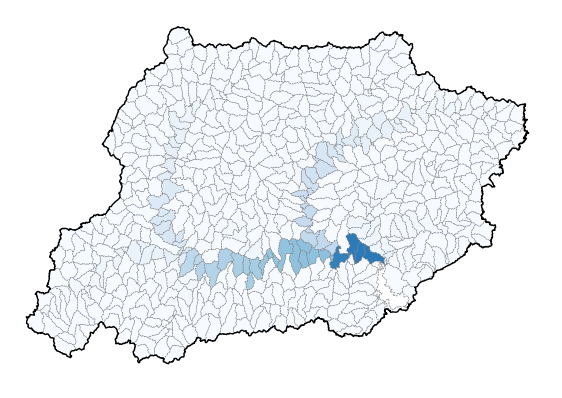

In [25]:

# GOOGLE
                                                                                                     
shape_google = gpd.read_file('03_Google/shapes/hybas_sa_lev12_v1c.shp')

# Normalize Upst_Area_ values
min_area = shape_google['UP_AREA'].min()
max_area = shape_google['UP_AREA'].max()
print(min_area)
print(max_area)

# Plot the total accumulated precipitation
fig, ax = plt.subplots(figsize=(7, 6))


# Plot the shapes with specific colorbar limits
shape_google.plot(ax=ax, facecolor = 'none', linewidth=0.4, edgecolor='grey', linestyle='--', zorder=2)

# Plot the shapes with specific colorbar limits
shape_google.plot(ax=ax, column='UP_AREA', cmap='Blues', linewidth=0.4, edgecolor='grey', linestyle='--',
                  vmin=bar_lim_inf, vmax=bar_lim_sup, zorder=2)

shape_data.plot(ax=ax, facecolor='white', linewidth=1, edgecolor='black', zorder=3)

# Customize plot
# ax.set_title(f'FloodHub - Hybas lev12')
# ax.set_xticks([])
# ax.set_yticks([])
ax.set_xlim(lon_min, lon_max)
ax.set_ylim(lat_min, lat_max)

# Hide the axes
ax.set_axis_off()

# Show the plot
plt.show()


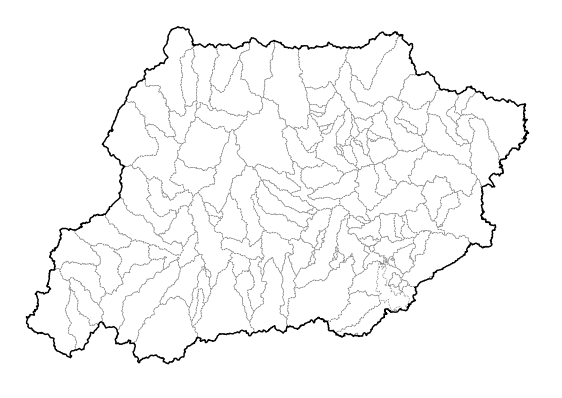

In [26]:
# SMHI
                                                                                                     
shape_hype = gpd.read_file('02_HYPE/shapes/SUBID_WWH_1_0_1_WHISTv18_simpl180m_ForVisOnly_RS.shp')


# Plot the total accumulated precipitation
fig, ax = plt.subplots(figsize=(7, 6))

# Plot shape data
shape_hype.plot(ax=ax, facecolor='none', linewidth=0.4, edgecolor='grey', linestyle='--', zorder = 2)
shape_data.plot(ax=ax, facecolor='white', linewidth=1, edgecolor='black', zorder = 3)


# Customize plot
# ax.set_title(f'SMHI - HYPE')
# ax.set_xticks([])
# ax.set_yticks([])
ax.set_xlim(lon_min, lon_max)
ax.set_ylim(lat_min, lat_max)

# Hide the axes
ax.set_axis_off()

# Show the plot
plt.show()

43.054599762
274895.25


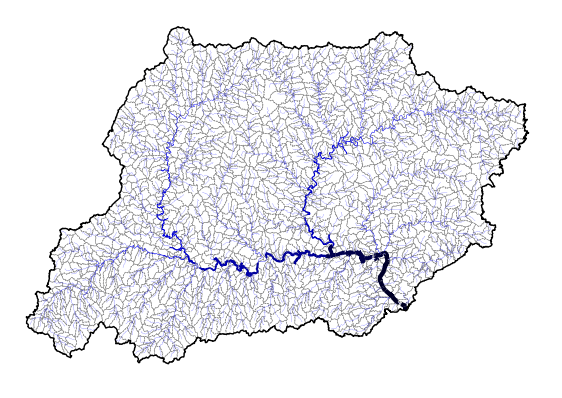

In [27]:

# IPH - MGB 

# Load shapefiles
shape_MGB = gpd.read_file('06_IPH/shapes/Minibacias_MGB.shp')
rios_MGB = gpd.read_file('06_IPH/shapes/Rios.shp')

# Normalize Upstream Drainage Area (`Upst_Area_`) for line thickness


# Normalize Upst_Area_ values
min_area = rios_MGB['Upst_Area_'].min()
max_area = rios_MGB['Upst_Area_'].max()
print(min_area)
print(max_area)

rios_MGB['linewidth'] = min_width + (rios_MGB['Upst_Area_'] - min_area) / (max_area - min_area) * (max_width - min_width)


# Create the plot
fig, ax = plt.subplots(figsize=(7, 6))

# Plot shape data

shape_MGB.plot(ax=ax, facecolor='none', linewidth=0.4, edgecolor='grey', linestyle='--',zorder = 1)

rios_MGB.plot(ax=ax, column='Upst_Area_', cmap=color_,
                  vmin=bar_lim_inf, vmax=bar_lim_sup, linewidth=rios_MGB['linewidth'],zorder = 2)

shape_data.plot(ax=ax, facecolor='white', linewidth=1, edgecolor='black', zorder = 3)

# Customize plot
# ax.set_title('IPH - MGB')
ax.set_xlim(lon_min, lon_max)
ax.set_ylim(lat_min, lat_max)

# Hide the axes
ax.set_axis_off()

# Show the plot
plt.show()



9590315.0
276431568896.0


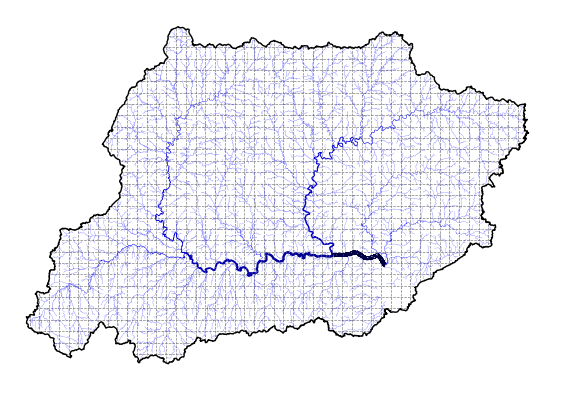

In [28]:
# GEOGLOWS


rivers_ = gpd.read_file('05_GEOGLOWS/shapes/streams_610.gpkg')
rivers_geo = rivers_.to_crs('EPSG:4618')


# Normalize Upst_Area_ values
min_area = rivers_geo['USContArea'].min()
max_area = rivers_geo['USContArea'].max()
print(min_area)
print(max_area)

rivers_geo['linewidth'] = min_width + (rivers_geo['USContArea'] - min_area) / (max_area - min_area) * (max_width - min_width)


# Define grid resolution in degrees (~0.081° latitude, longitude varies)
lat_spacing = 0.09  # Approximate for 9 km
lon_spacing = 0.09  # Approximate, but varies with latitude



# Generate grid lines
lon_lines = np.arange(lon_min, lon_max, lon_spacing)
lat_lines = np.arange(lat_min, lat_max, lat_spacing)


# Plot the total accumulated precipitation
fig, ax = plt.subplots(figsize=(7, 6))

# Add grid lines
for lon in lon_lines:
    ax.axvline(x=lon, color='gray', linestyle='--', linewidth=0.5)

for lat in lat_lines:
    ax.axhline(y=lat, color='gray', linestyle='--', linewidth=0.5)

# Plot shape data

rivers_geo.plot(ax=ax, column='USContArea', cmap=color_,
                  vmin=bar_lim_inf*1000000, vmax=bar_lim_sup*1000000, linewidth=rivers_geo['linewidth'],zorder=2)

shape_data.plot(ax=ax, facecolor='white', linewidth=1, edgecolor='black',zorder=3)


# Customize plot
# ax.set_title(f'GEOGloWS ~9km grid')
# ax.set_xticks([])
# ax.set_yticks([])
ax.set_xlim(lon_min, lon_max)
ax.set_ylim(lat_min, lat_max)

# Hide the axes
ax.set_axis_off()

# Show the plot
plt.show()

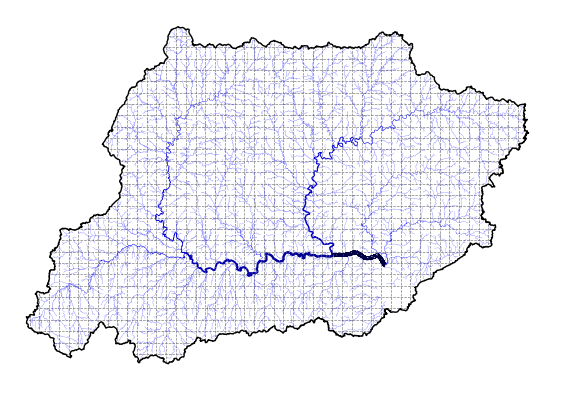

In [29]:


# Plot the total accumulated precipitation
fig, ax = plt.subplots(figsize=(7, 6))

# Add grid lines
for lon in lon_lines:
    ax.axvline(x=lon, color='gray', linestyle='--', linewidth=0.5)

for lat in lat_lines:
    ax.axhline(y=lat, color='gray', linestyle='--', linewidth=0.5)

# Plot shape data

rivers_geo.plot(ax=ax, column='USContArea', cmap=color_,
                  vmin=bar_lim_inf*1000000, vmax=bar_lim_sup*1000000, linewidth=rivers_geo['linewidth'],zorder=2)

shape_data.plot(ax=ax, facecolor='white', linewidth=1, edgecolor='black',zorder=3)


# Customize plot
# ax.set_title(f'GEOGloWS ~9km grid')
# ax.set_xticks([])
# ax.set_yticks([])
ax.set_xlim(lon_min, lon_max)
ax.set_ylim(lat_min, lat_max)

# Hide the axes
ax.set_axis_off()

# Show the plot
plt.show()

25.918143999999998
937525.57568


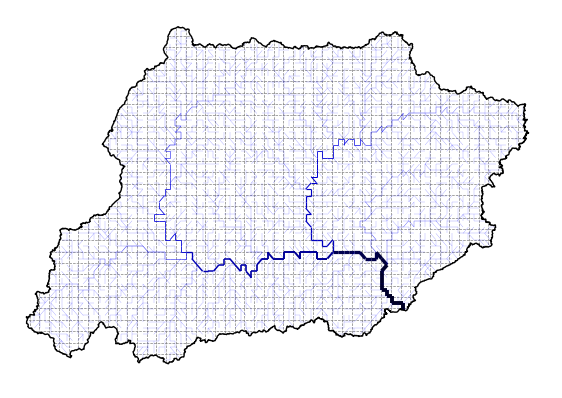

In [32]:
# GloFAS



min_width = 0.1  # Minimum linewidth
max_width = 30.0  # Maximum linewidth



rivers_glofas = gpd.read_file('01_GloFAS/glofas_stream_network.guaiba.gpkg')

# Normalize Upstream Drainage Area (`Upst_Area_`) for line thickness


# Normalize Upst_Area_ values
min_area = rivers_glofas['upstream_area_sqkm'].min()
max_area = rivers_glofas['upstream_area_sqkm'].max()
print(min_area)
print(max_area)

rivers_glofas['linewidth'] = min_width + (rivers_glofas['upstream_area_sqkm'] - min_area) / (max_area - min_area) * (max_width - min_width)


# Define grid resolution in degrees (~0.081° latitude, longitude varies)
lat_spacing = 0.09  # Approximate for 9 km
lon_spacing = 0.09  # Approximate, but varies with latitude


# Generate grid lines
lon_lines = np.arange(lon_min, lon_max, lon_spacing)
lat_lines = np.arange(lat_min, lat_max, lat_spacing)


# Plot the total accumulated precipitation
fig, ax = plt.subplots(figsize=(7, 6))

# Add grid lines
for lon in lon_lines:
    ax.axvline(x=lon, color='gray', linestyle='--', linewidth=0.5)

for lat in lat_lines:
    ax.axhline(y=lat, color='gray', linestyle='--', linewidth=0.5)

# Plot shape data

rivers_glofas.plot(ax=ax, column='upstream_area_sqkm', cmap=color_,
                  vmin=bar_lim_inf, vmax=bar_lim_sup, linewidth=rivers_glofas['linewidth'],zorder=2)

shape_data.plot(ax=ax, facecolor='white', linewidth=1, edgecolor='black', zorder=3)


# Customize plot
# ax.set_title(f'GEOGloWS ~9km grid')
# ax.set_xticks([])
# ax.set_yticks([])
ax.set_xlim(lon_min, lon_max)
ax.set_ylim(lat_min, lat_max)

# Hide the axes
ax.set_axis_off()

# Show the plot
plt.show()